IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

IMPORT DATASET

In [3]:
economies_cost = pd.read_csv("EconomiesOfScale.csv")

In [4]:
economies_cost.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [5]:
economies_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [6]:
economies_cost.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


Visualize data

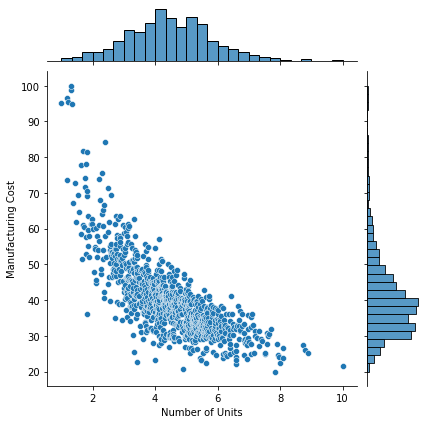

In [9]:
sns.jointplot(x="Number of Units", y="Manufacturing Cost", data=economies_cost)

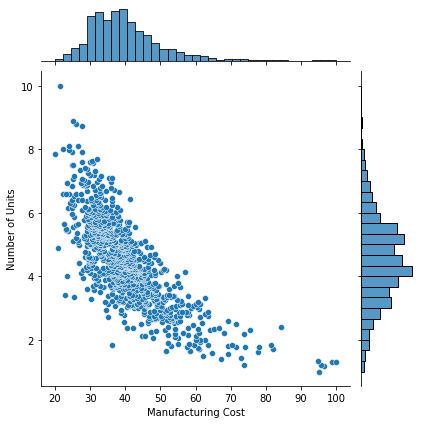

In [11]:
sns.jointplot(x="Manufacturing Cost",y="Number of Units", data=economies_cost)

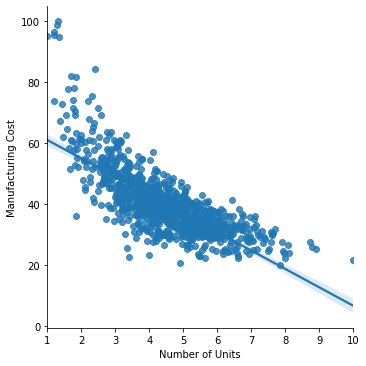

In [12]:
sns.lmplot(x="Number of Units", y="Manufacturing Cost", data=economies_cost)

creating training and testing data

In [17]:
X = economies_cost[["Number of Units"]]

In [20]:
y= economies_cost["Manufacturing Cost"]

In [21]:
# Note that we used the entire dataset for training only 
X_train = X
y_train = y

TRAIN MODEL

In [22]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor = LinearRegression(fit_intercept=True)

In [25]:
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
print('Model Coefficient: ', regressor.coef_)

Model Coefficient:  [-6.0333683]


Visualize the results

Text(0.5, 1.0, 'Unit Cost vs. Number of Units [in Millions](Training dataset)')

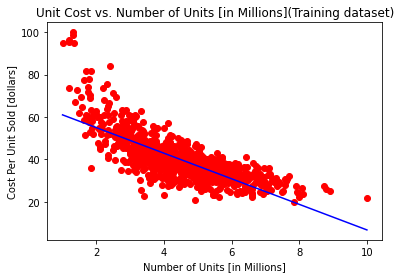

In [28]:
plot.scatter(X_train, y_train, color = 'red')
plot.plot(X_train, regressor.predict(X_train), color = 'blue')
plot.ylabel('Cost Per Unit Sold [dollars]')
plot.xlabel('Number of Units [in Millions]')
plot.title('Unit Cost vs. Number of Units [in Millions](Training dataset)')

The above line does not fit the data features well, Hence try polynomial regression

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly_regressor = PolynomialFeatures(degree=5)

In [33]:
X_columns = poly_regressor.fit_transform(X_train)

In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression()

In [37]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [ 0.00000000e+00 -9.24985286e+01  3.06811266e+01 -5.35771972e+00
  4.64221376e-01 -1.56845726e-02]
Linear Model Coefficient (b):  159.92093215062988


In [40]:
y_predict = regressor.predict(poly_regressor.fit_transform(X_train))

Visualize the results

Text(0.5, 1.0, 'Unit Cost vs. Number of Units [in Millions](Training dataset)')

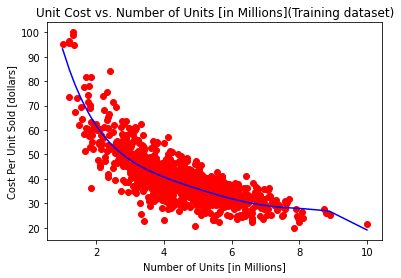

In [41]:
plot.scatter(X_train, y_train, color = 'red')
plot.plot(X_train, y_predict, color = 'blue')
plot.ylabel('Cost Per Unit Sold [dollars]')
plot.xlabel('Number of Units [in Millions]')
plot.title('Unit Cost vs. Number of Units [in Millions](Training dataset)')